**Installing necessary libraries:**

In [1]:
install.packages("proxy")     # for cosine distance
install.packages("ggdendro")  # optional for ggplot dendrograms
library(proxy)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix




In [21]:
# Load data and remove the label
df <- read.csv("tfidf_data.csv")

df$bert_label <- NULL

In [22]:
# Normalize the TF-IDF matrix
norm_df <- as.data.frame(lapply(df, function(x) x / sqrt(sum(x^2))))

In [23]:
# Compute cosine distance matrix
cosine_dist <- dist(norm_df, method = "cosine")

In [24]:
# Hierarchical Clustering using 'average' linkage (cosine-compatible)
hc <- hclust(cosine_dist, method = "average")

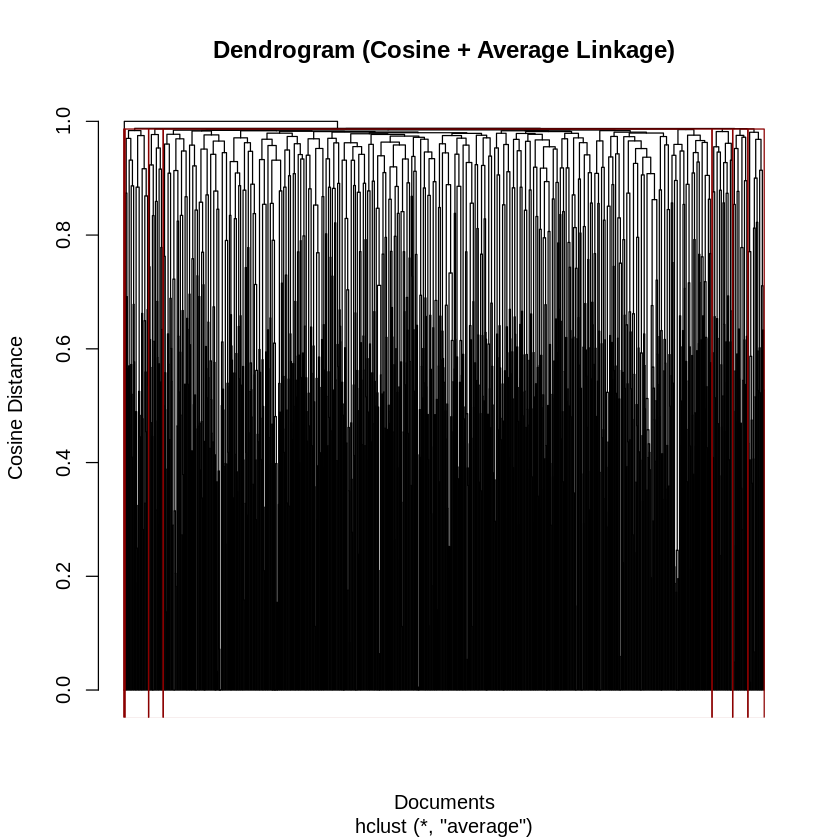

In [25]:
# Plotting the clustering
plot(hc, labels = FALSE, hang = -1, main = "Dendrogram (Cosine + Average Linkage)",
     xlab = "Documents", ylab = "Cosine Distance", cex = 0.3)

rect.hclust(hc, k = 7, border = "darkred")

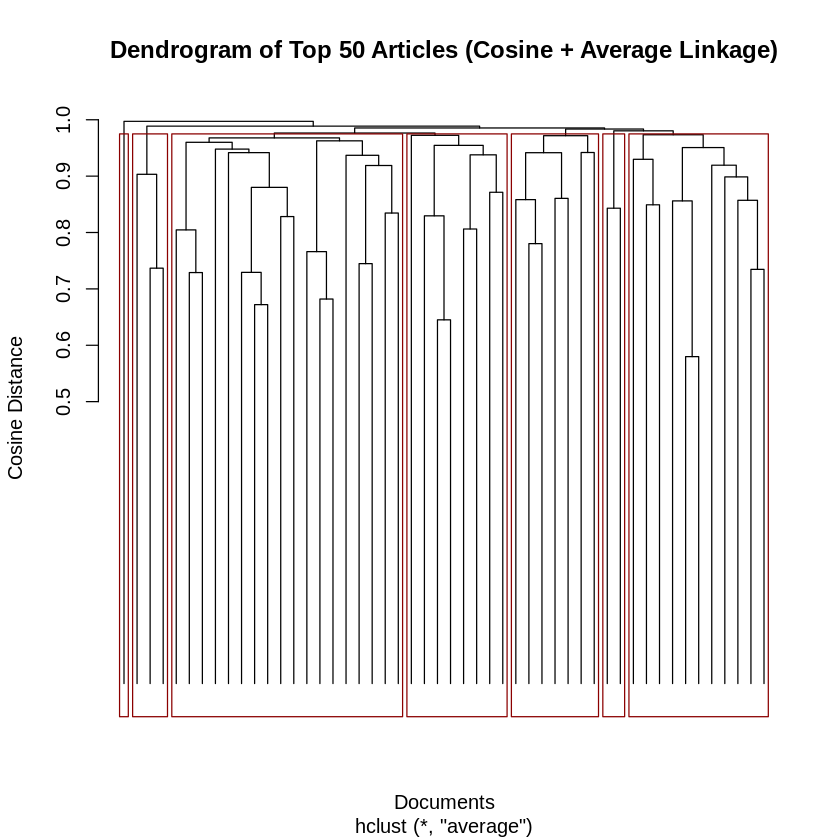

In [27]:
df_small <- df[1:50, ]

# Normalize
norm_df <- as.data.frame(lapply(df_small, function(x) x / sqrt(sum(x^2))))

# Cosine distance
cosine_dist <- dist(norm_df, method = "cosine")

# Hierarchical clustering
hc <- hclust(cosine_dist, method = "average")

# Plot clean dendrogram with highlighted clusters
plot(hc, labels = FALSE, hang = -1, cex = 0.7,
     main = "Dendrogram of Top 50 Articles (Cosine + Average Linkage)",
     xlab = "Documents", ylab = "Cosine Distance")

rect.hclust(hc, k = 7, border = "darkred")